In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Resultados_Saber_Pro_nonull.csv')
df

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
1,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
2,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
3,20183,EK201830129217,CC,COLOMBIA,70.0,SUCRE,70001.0,SINCELEJO,1.700010e+11,70001.0,...,No,Ninguno,NO OFICIAL - CORPORACIÓN,120,127.0,2.0,-A1,152,121.0,127
4,20183,EK201830138320,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.110010e+11,11001.0,...,Si,Técnica o tecnológica incompleta,NO OFICIAL - FUNDACIÓN,128,165.0,3.0,A2,169,159.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711860,20222,EK202220206584,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,2.111020e+11,11001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,168,125.0,2.0,A2,144,156.0,134
711861,20222,EK202220148630,CC,COLOMBIA,41.0,HUILA,41396.0,LA PLATA,2.413960e+11,41396.0,...,Si,Primaria incompleta,OFICIAL NACIONAL,101,149.0,2.0,A2,153,134.0,140
711862,20222,EK202220164335,CC,COLOMBIA,54.0,NORTE SANTANDER,54810.0,TIBÚ,1.548100e+11,54810.0,...,No,Primaria completa,NO OFICIAL - FUNDACIÓN,91,135.0,2.0,A2,100,132.0,93
711863,20222,EK202220142587,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.230010e+11,23001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,159,162.0,3.0,B1,190,178.0,163


In [3]:
sorted(df['PERIODO'].unique())

[20183, 20184, 20195, 20196, 20203, 20212, 20222, 20225]

In [191]:
def plot_circular_diagram(sub_df: pd.DataFrame, y_label: str, path: str,
						  title: str = '', figsize: tuple = (5, 5),
						  autopct: str = '%1.1f%%', startangle: int = 130,
						  pctdistance: float = 0.8) -> None:
	"""  """
	counts = sub_df[y_label].value_counts()
	plt.figure(figsize=figsize)
	plt.pie(counts, labels=counts.index, autopct=autopct, startangle=startangle, pctdistance=pctdistance)
	plt.title(title)
	plt.savefig(path, transparent=True)


def plot_time_serie(sub_df: pd.DataFrame, x: str, path: str, title: str = '', x_label: str = '',
					y_label: str = '', figsize: tuple = (5, 5), hue: str | None = None) -> None:
	"""  """
	plt.figure(figsize=figsize)
	plt.title(title)
	sns.histplot(sub_df, x=x, stat='count', kde=True, hue=hue)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.savefig(path, transparent=True)
	
	
def plot_socioeconomic_variables(sub_df: pd.DataFrame) -> None:
	"""  """
	plot_circular_diagram(sub_df, 'FAMI_ESTRATOVIVIENDA', 'static/imgs/saber_pro/estrato.png', title='ESTRATO VIVIENDA')
	plot_circular_diagram(sub_df, 'ESTU_HORASSEMANATRABAJA', 'static/imgs/saber_pro/horas_semana.png', title='HORAS TRABAJADAS POR SEMANA')
	plot_circular_diagram(sub_df, 'ESTU_PRIVADO_LIBERTAD', 'static/imgs/saber_pro/privado_libertad.png', title='PRIVADO DE LA LIBERTAD')
	plot_circular_diagram(sub_df, 'FAMI_TIENEAUTOMOVIL', 'static/imgs/saber_pro/automovil.png', title='TIENE AUTOMOVIL')
	plot_circular_diagram(sub_df, 'FAMI_TIENELAVADORA', 'static/imgs/saber_pro/lavadora.png', title='TIENE LAVADORA')
	plot_circular_diagram(sub_df, 'FAMI_TIENECOMPUTADOR', 'static/imgs/saber_pro/computador.png', title='TIENE COMPUTADORA')
	plot_circular_diagram(sub_df, 'FAMI_TIENEINTERNET', 'static/imgs/saber_pro/internet.png', title='TIENE INTERNET')
	plot_circular_diagram(sub_df, 'FAMI_EDUCACIONMADRE', 'static/imgs/saber_pro/educacion_madre.png', title='NIVEL EDUCATIVO MADRE')
	plot_circular_diagram(sub_df, 'FAMI_EDUCACIONPADRE', 'static/imgs/saber_pro/educacion_padre.png', title='NIVEL EDUCATIVO PADRE')


def plot_puntuations_variables(sub_df: pd.DataFrame, hue: str | None = None) -> None:
	"""  """
	plot_time_serie(sub_df, x='MOD_RAZONA_CUANTITAT_PUNT', path='static/imgs/saber_pro/puntaje_razo_cuanti.png',
				    x_label='PUNTAJE', y_label='CANTIDAD', title='RAZONAMIENTO CUANTITATIVO', hue=hue)
	plot_time_serie(sub_df, x='MOD_COMUNI_ESCRITA_PUNT', path='static/imgs/saber_pro/puntaje_comuni_escrita.png',
				    x_label='PUNTAJE', y_label='CANTIDAD', title='COMUNICACION ESCRITA', hue=hue)
	plot_time_serie(sub_df, x='MOD_INGLES_PUNT', path='static/imgs/saber_pro/puntaje_ingles.png',
				    x_label='PUNTAJE', y_label='CANTIDAD', title='INGLES', hue=hue)
	plot_time_serie(sub_df, x='MOD_LECTURA_CRITICA_PUNT', path='static/imgs/saber_pro/puntaje_lectu_critica.png',
				    x_label='PUNTAJE', y_label='CANTIDAD', title='LECTURA CRITICA', hue=hue)
	plot_time_serie(sub_df, x='MOD_COMPETEN_CIUDADA_PUNT', path='static/imgs/saber_pro/puntaje_compe_ciudadanas.png',
				    x_label='PUNTAJE', y_label='CANTIDAD', title='COMPETENCIAS CIUDADANAS', hue=hue)


def plot_graphs_saber_pro(**kwargs) -> None:
	"""
	Quizás aparezcan más parametros para 'department',
	'municipality' o 'institution' con unos números al final

	kwargs = {
		'period': int

		'department': str | None,
		'municipality': str | None,
		'institution': str | None,
		
		...
	}
	"""
	label_dept, label_municipality, label_institution = 'ESTU_INST_DEPARTAMENTO', 'ESTU_INST_MUNICIPIO', 'INST_NOMBRE_INSTITUCION'
	kwargs = dict(kwargs)
	keys = kwargs.keys()
	print(kwargs)

	period = kwargs['period']
	sub_df = df[df['PERIODO'] == period]
	if not any(map(lambda param: kwargs[param] is not None if 'department' in param else False, keys)):
		# No tiene departamento -> Analizar país
		plot_puntuations_variables(sub_df)
		plot_socioeconomic_variables(sub_df)
		return
	
	depts = [kwargs[param] for param in kwargs if 'department' in param]
	sub_df = sub_df[sub_df[label_dept].isin(depts)]
	if not any(map(lambda param: kwargs[param] is not None if 'municipality' in param else False, keys)):
		# Tiene departamento -> No municipio
		plot_puntuations_variables(sub_df)
		plot_socioeconomic_variables(sub_df)
		return

	munis = [kwargs[param] for param in kwargs if 'municipality' in param]
	sub_df = sub_df[sub_df[label_municipality].isin(munis)]
	if not any(map(lambda param: kwargs[param] is not None if 'institution' in param else False, keys)):
		# Tiene Municipio -> No institución
		plot_socioeconomic_variables(sub_df)
		return

	# Tiene Institución
	insts = [kwargs[param] for param in kwargs if 'institution' in param]
	sub_df = sub_df[sub_df[label_institution].isin(insts)]
	plot_socioeconomic_variables(sub_df)
	

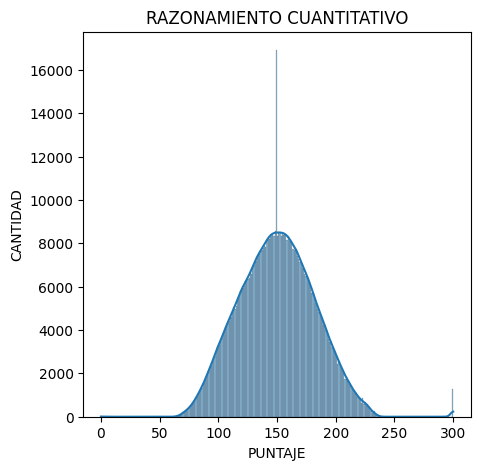

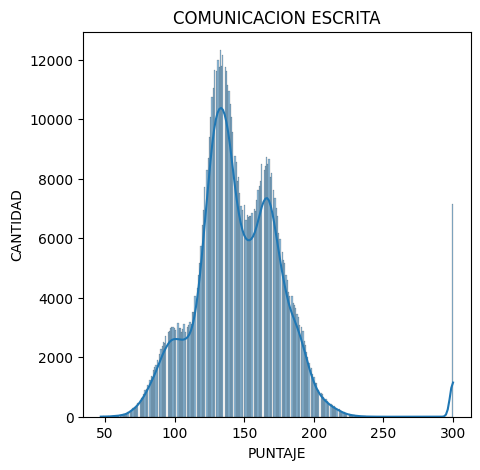

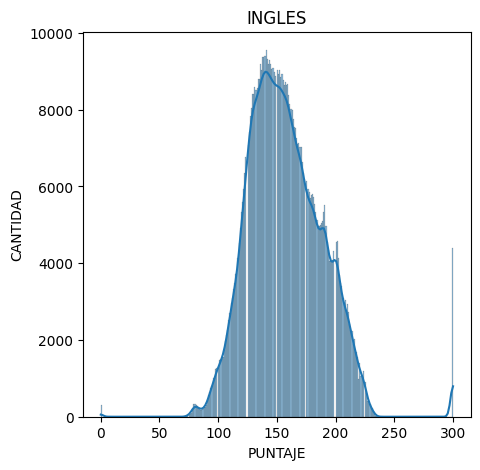

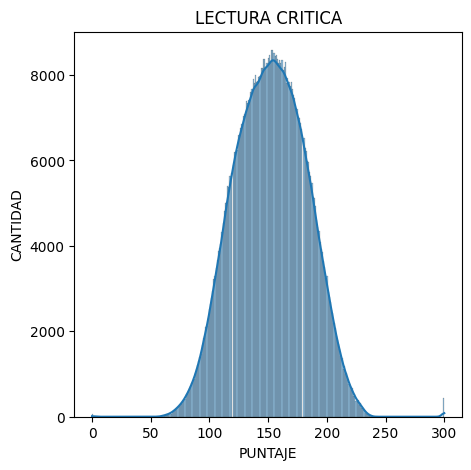

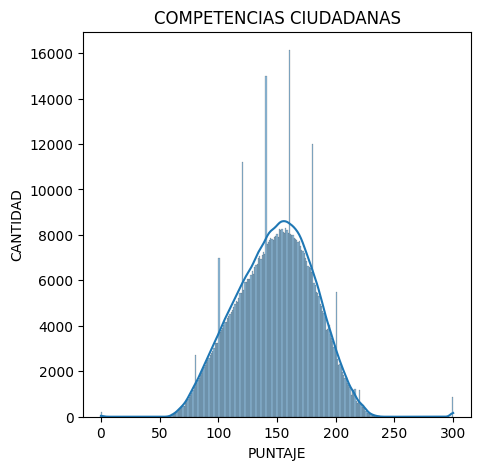

In [192]:
plot_puntuations_variables(df)

{'periodo_inicio': 20183, 'periodo_final': 20225, 'departments': 'BOLIVAR', 'municipality': 'CARTAGENA DE INDIAS', 'institution1': 'UNIVERSIDAD DE CARTAGENA-CARTAGENA', 'institution2': 'UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA'}


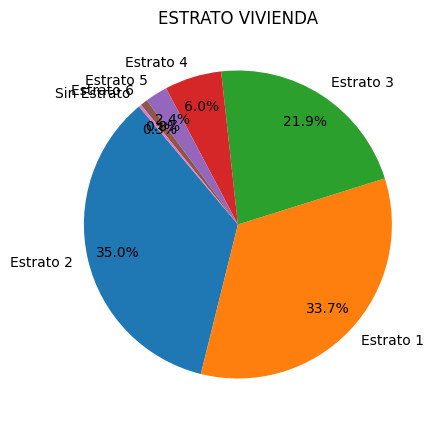

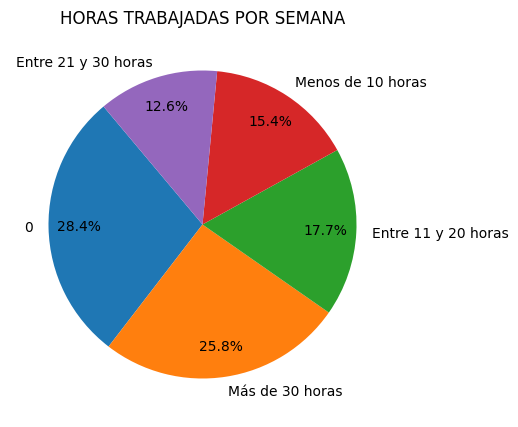

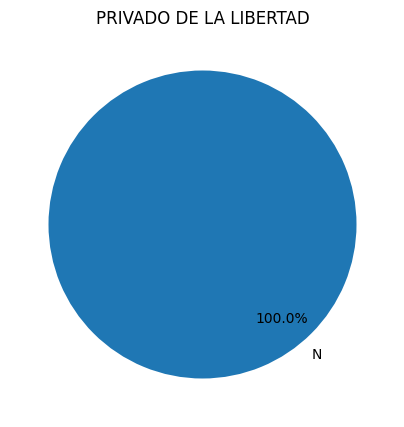

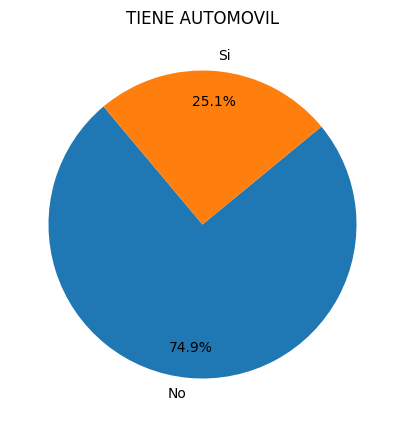

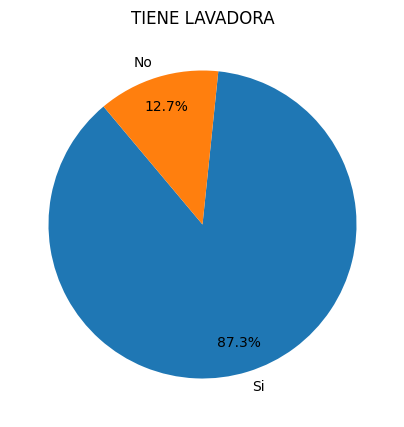

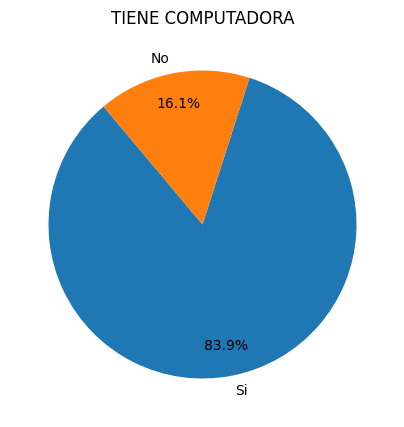

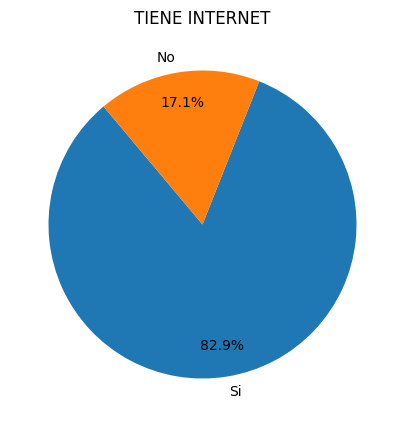

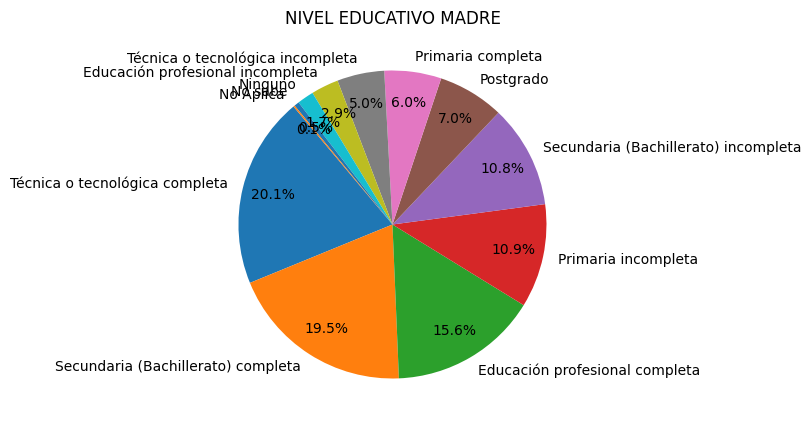

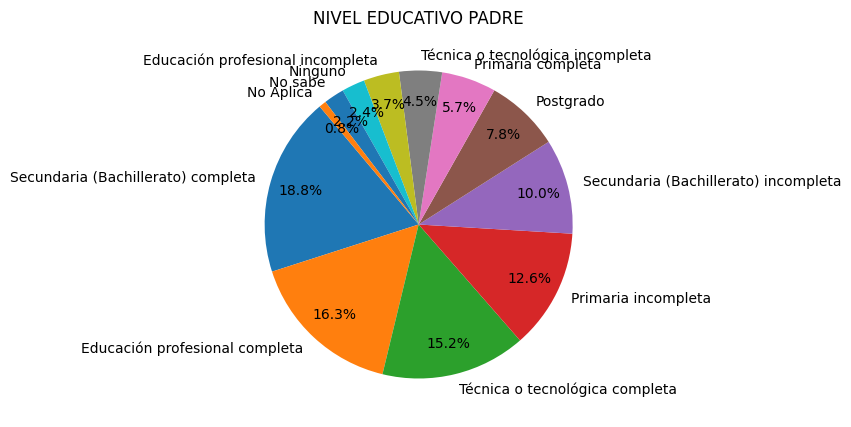

In [167]:
plot_graphs_saber_pro(period=20183,
					  departments='BOLIVAR', municipality='CARTAGENA DE INDIAS',
					  institution1='UNIVERSIDAD DE CARTAGENA-CARTAGENA',
					  institution2='UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA')

In [77]:
start_period, end_period = 20183, 20225

df[(start_period <= df['PERIODO']) & (df['PERIODO'] <= end_period)]

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830167993,CC,COLOMBIA,73.0,TOLIMA,73001.0,IBAGUÉ,1.730010e+11,73001.0,...,Si,No sabe,NO OFICIAL - CORPORACIÓN,142,77.0,1.0,A1,124,130.0,153
1,20183,EK201830168158,CC,COLOMBIA,68.0,SANTANDER,68081.0,BARRANCABERMEJA,1.680810e+11,68081.0,...,Si,Técnica o tecnológica completa,OFICIAL DEPARTAMENTAL,185,157.0,3.0,-A1,178,106.0,169
2,20183,EK201830164354,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,1.110010e+11,11001.0,...,Si,Educación profesional completa,OFICIAL DEPARTAMENTAL,114,132.0,2.0,A1,139,135.0,126
3,20183,EK201830129217,CC,COLOMBIA,70.0,SUCRE,70001.0,SINCELEJO,1.700010e+11,70001.0,...,No,Ninguno,NO OFICIAL - CORPORACIÓN,120,127.0,2.0,-A1,152,121.0,127
4,20183,EK201830138320,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.110010e+11,11001.0,...,Si,Técnica o tecnológica incompleta,NO OFICIAL - FUNDACIÓN,128,165.0,3.0,A2,169,159.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711860,20222,EK202220206584,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,2.111020e+11,11001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,168,125.0,2.0,A2,144,156.0,134
711861,20222,EK202220148630,CC,COLOMBIA,41.0,HUILA,41396.0,LA PLATA,2.413960e+11,41396.0,...,Si,Primaria incompleta,OFICIAL NACIONAL,101,149.0,2.0,A2,153,134.0,140
711862,20222,EK202220164335,CC,COLOMBIA,54.0,NORTE SANTANDER,54810.0,TIBÚ,1.548100e+11,54810.0,...,No,Primaria completa,NO OFICIAL - FUNDACIÓN,91,135.0,2.0,A2,100,132.0,93
711863,20222,EK202220142587,CC,COLOMBIA,11.0,BOGOTÁ,11001.0,BOGOTÁ D.C.,3.230010e+11,23001.0,...,Si,Secundaria (Bachillerato) completa,NO OFICIAL - FUNDACIÓN,159,162.0,3.0,B1,190,178.0,163


In [160]:
df[df['ESTU_INST_MUNICIPIO'].isin(['CARTAGENA DE INDIAS'])]['INST_NOMBRE_INSTITUCION'].unique()

array(['UNIVERSIDAD DE SAN BUENAVENTURA-CARTAGENA',
       'UNIVERSIDAD DE CARTAGENA-CARTAGENA',
       'FUNDACION UNIVERSITARIA TECNOLOGICO COMFENALCO - CARTAGENA      -CARTAGENA',
       'ESCUELA NAVAL DE CADETES"ALMIRANTE PADILLA"-CARTAGENA',
       'FUNDACION UNIVERSITARIA COLOMBO INTERNACIONAL - UNICOLOMBO-CARTAGENA',
       'CORPORACION UNIVERSITARIA RAFAEL NUÑEZ-CARTAGENA',
       'FUNDACION UNIVERSIDAD DE BOGOTA"JORGE TADEO LOZANO"-CARTAGENA',
       'UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA',
       "UNIVERSIDAD DEL SINÚ 'Elías Bechara Zainúm' - UNISINÚ-CARTAGENA",
       'CORPORACION UNIVERSITARIA REGIONAL DEL CARIBE- IAFIC-CARTAGENA',
       'COLEGIO MAYOR DE BOLIVAR-CARTAGENA',
       'INSTITUCION UNIVERSITARIA BELLAS ARTES Y CIENCIAS DE BOLIVAR-CARTAGENA',
       'FUNDACION TECNOLOGICA "ANTONIO DE AREVALO"-CARTAGENA',
       'INSTITUCIÓN UNIVERSITARIA MAYOR DE CARTAGENA'], dtype=object)

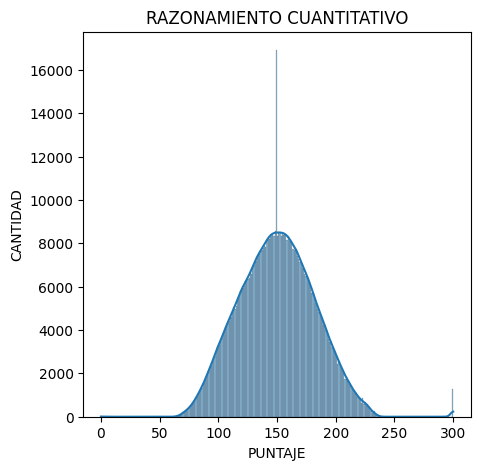

In [187]:
plot_time_serie(df, x='PERIODO', y='MOD_RAZONA_CUANTITAT_PUNT', path='static/imgs/saber_pro/puntaje_razo_cuanti.png',
				x_label='PUNTAJE', y_label='CANTIDAD', title='RAZONAMIENTO CUANTITATIVO')